In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

model = VGG16(weights='imagenet', include_top=True)

2025-04-07 08:18:16.953309: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-07 08:18:17.601280: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 163s 0us/step


In [4]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

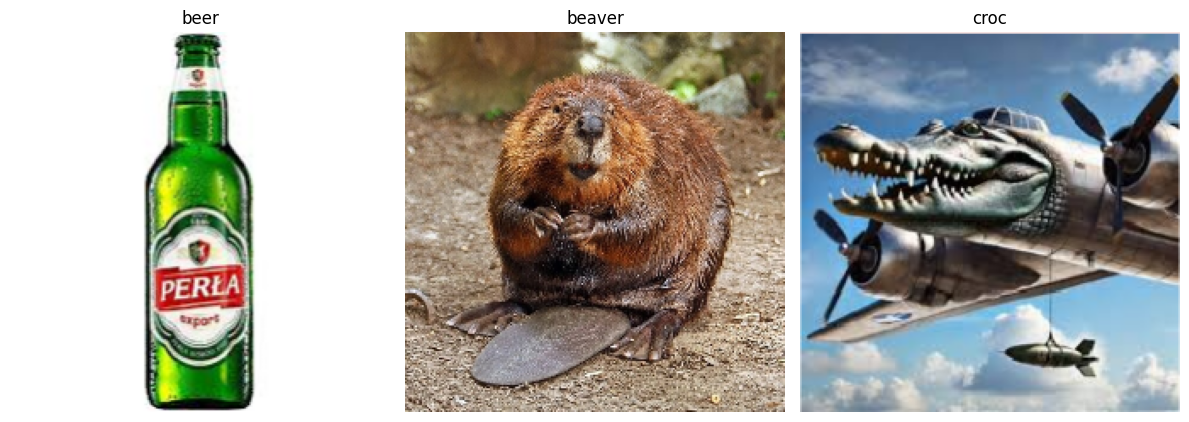

In [92]:
import cv2
import warnings
warnings.filterwarnings('ignore')

img_title = ['beer', 'beaver', 'croc']

beer_path = '/home/plorenc/Desktop/AiR_ISS/ML/img/perla_export.jpeg'
beaver_path = '/home/plorenc/Desktop/AiR_ISS/ML/img/bobr.jpg'
croc_path = '/home/plorenc/Desktop/AiR_ISS/ML/img/crocdilo_bombardiro.webp'

img_beer = cv2.imread(beer_path); img_beer = cv2.cvtColor(img_beer, cv2.COLOR_BGR2RGB)
img_beaver = cv2.imread(beaver_path); img_beaver = cv2.cvtColor(img_beaver, cv2.COLOR_BGR2RGB)
img_croc = cv2.imread(croc_path); img_croc = cv2.cvtColor(img_croc, cv2.COLOR_BGR2RGB)

img_beer = cv2.resize(img_beer, (224, 224))
img_beaver = cv2.resize(img_beaver, (224, 224))
img_croc = cv2.resize(img_croc, (224, 224))

imgs = np.asarray([img_beer, img_beaver, img_croc])

img_beer = preprocess_input(img_beer)
img_beaver = preprocess_input(img_beaver)
img_croc = preprocess_input(img_croc)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs = axs.flatten()

for i in range(len(axs)):
    axs[i].imshow(imgs[i])
    axs[i].set_title(img_title[i])
    axs[i].axis('off')

plt.tight_layout()

In [73]:
preds = []
best_preds = []

for i in range(len(imgs)):
    img = imgs[i]
    img = np.expand_dims(img, axis=0)
    print(img.shape)
    logits = model.predict(img)
    best_pred = np.argmax(logits)
    best_preds.append(best_pred)
    pred = decode_predictions(logits, top=3)[0]
    preds.append(pred)

(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [74]:
preds

[[('n02823428', 'beer_bottle', 0.80950946),
  ('n03983396', 'pop_bottle', 0.0374526),
  ('n04591713', 'wine_bottle', 0.014477188)],
 [('n02363005', 'beaver', 0.91115296),
  ('n02361337', 'marmot', 0.08591004),
  ('n02444819', 'otter', 0.0024623368)],
 [('n04552348', 'warplane', 0.46597248),
  ('n02690373', 'airliner', 0.25627938),
  ('n04266014', 'space_shuttle', 0.13435233)]]

In [75]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

In [94]:
def visualise_heatmap(maps, images):
    fig, axs = plt.subplots(1, len(images), figsize=(4 * len(images), 4))

    for i in range(len(images)):
        heatmap = np.uint8(cm.jet(maps[i]))[..., :3] * 255
        axs[i].imshow(images[i])
        axs[i].imshow(heatmap, cmap='jet', alpha=0.5)
        axs[i].set_title(img_title[i])
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

### GradCam

In [95]:
replace2linear = ReplaceToLinear()
score = CategoricalScore(list(best_preds))

gradcam = Gradcam(
    model, 
    model_modifier = replace2linear,
    clone=True
)

cam = gradcam(
    score,
    imgs,
    penultimate_layer=-1
)
imgs = np.stack(imgs, axis=0) 
visualise_heatmap(cam,imgs)

AttributeError: 'NoneType' object has no attribute 'ndim'

### GradCam ++

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].


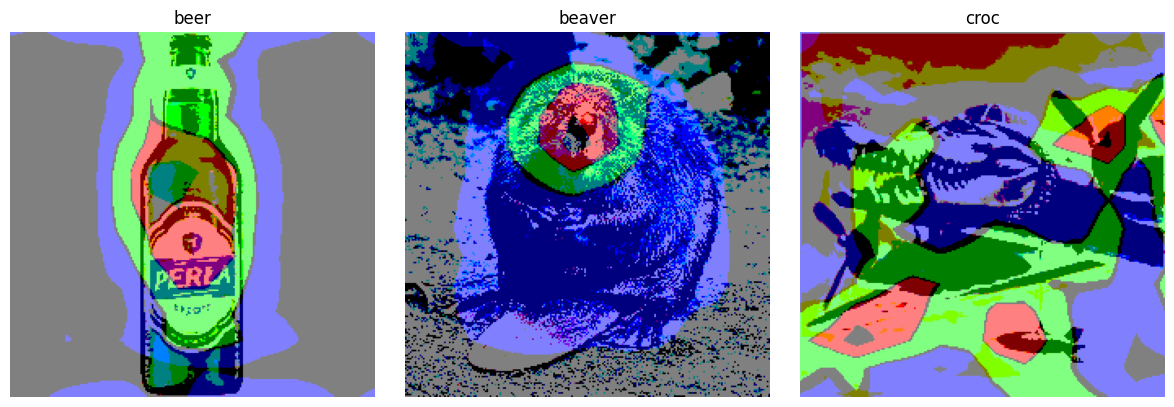

In [79]:
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)
 
cam = gradcam(score,
              imgs,
              penultimate_layer=-1)
 
visualise_heatmap(cam,imgs)

### ScoreCap

48/48 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].


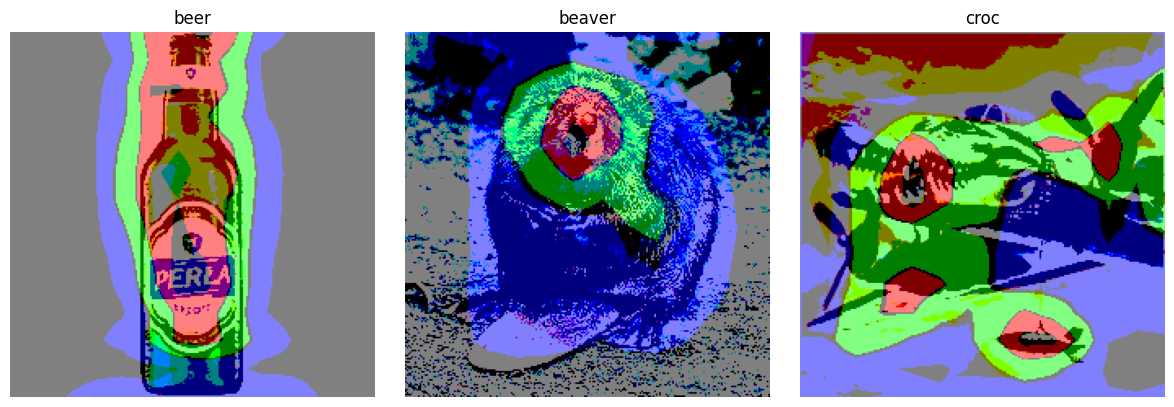

In [80]:
scorecam = Scorecam(
    model
)

cam = scorecam(
    score, 
    imgs,
    penultimate_layer=-1
)

visualise_heatmap(cam,imgs)

### Saliency Maps

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].


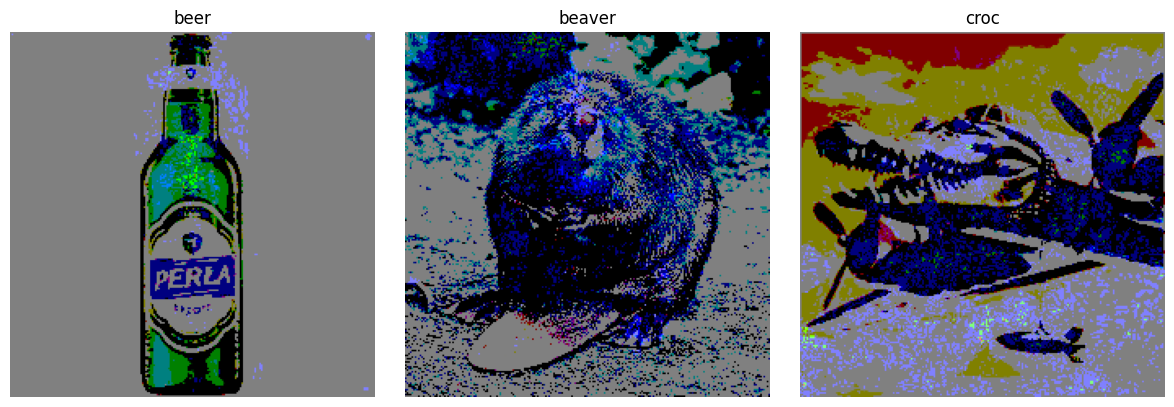

In [ ]:
saliency = Saliency(
    model, 
    model_modifier = replace2linear,
    clone = True
)

saliency_map = saliency(
    score,
    imgs    
)

visualise_heatmap(saliency_map, imgs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].


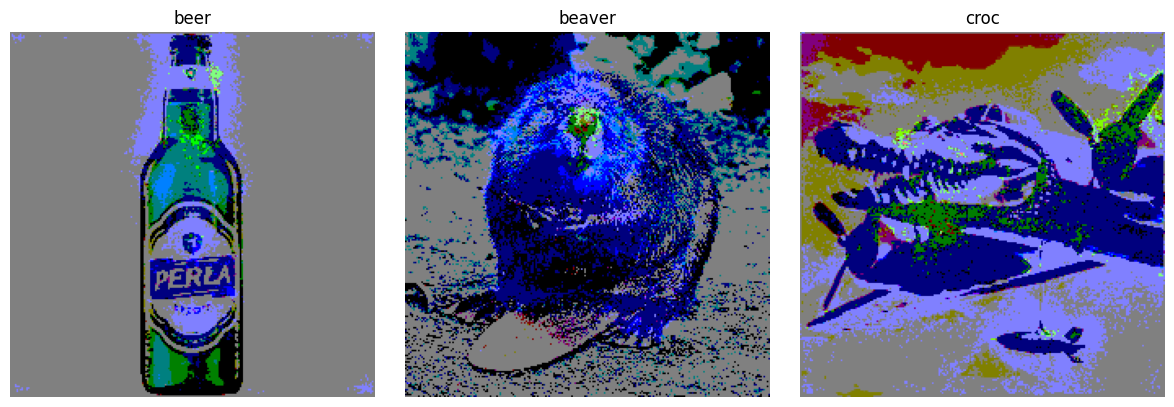

In [84]:
saliency_map = saliency(score, imgs, smooth_samples=20, smooth_noise=0.20)
visualise_heatmap(saliency_map,imgs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


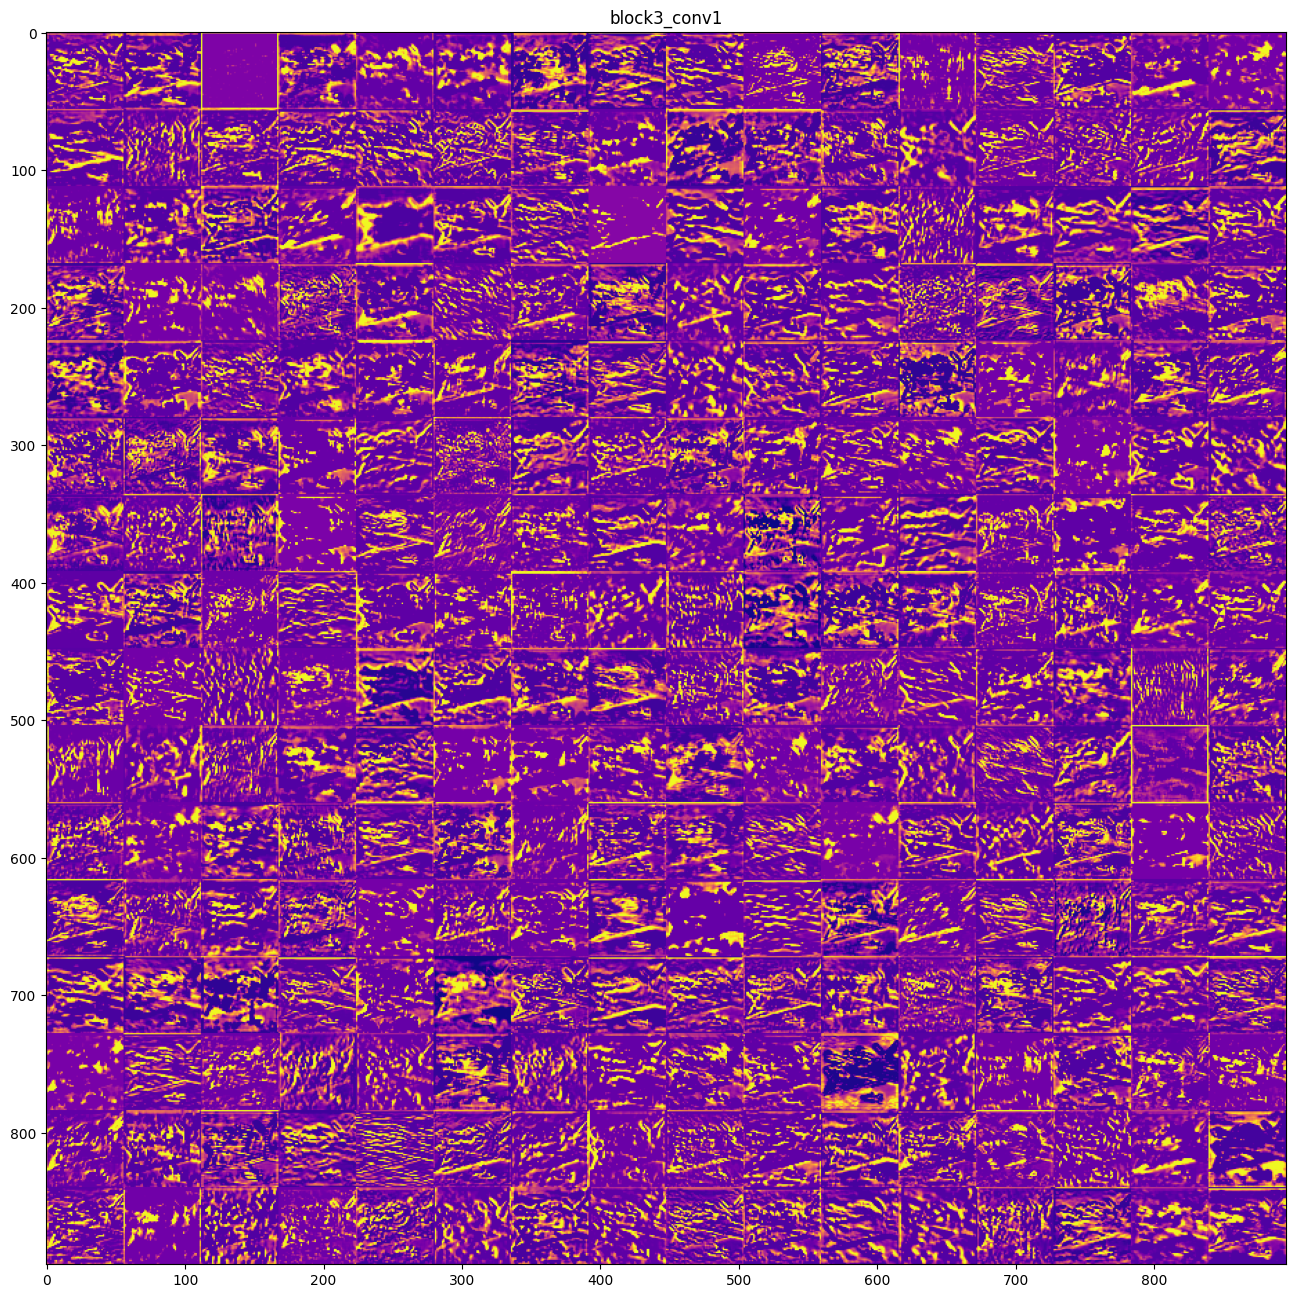

In [91]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

X_reshaped = np.expand_dims(img_croc, axis=0)

activations = activation_model.predict(X_reshaped)

layer_names = [layer.name for layer in model.layers]

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name == "block3_conv1":
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= (channel_image.std() + 1e-5)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='plasma')
